# 🌍 Application of Machine Learning in Atmospheric Chemistry 🤖

Atmospheric chemistry is a critical field that studies the chemical composition of the Earth's atmosphere and the processes that govern it. Understanding this complex system is essential for tackling issues such as air pollution, climate change, and human health impacts.

---

## 🧠 Why Use Machine Learning?

Machine Learning (ML) provides powerful tools to analyze large-scale, high-dimensional environmental data. In the context of atmospheric chemistry, ML can be used to:

- 🔍 **Predict pollutant concentrations** in different regions based on meteorological and emission data.
- 📈 **Analyze trends** and long-term changes in atmospheric composition.
- 🧭 **Identify pollution sources** and their contributions using classification or clustering algorithms.
- 🔬 **Model chemical reactions** and interactions between atmospheric compounds more efficiently than traditional numerical models.
- 🌐 **Improve remote sensing** data interpretation from satellites and ground-based instruments.

---

## 🧪 What You'll Find in This Notebook

In the following sections, we apply various machine learning techniques to tackle real-world problems in atmospheric chemistry. Each cell introduces a new ML method applied to a specific atmospheric issue:

- Emulate Kinetics
- Source Attribute
- Enhancing Solver


Let’s explore how data-driven models can help us better understand and protect our atmosphere 🌫️💨.


### Source Attribute in Atmospheric Chemistry

The **source attribute** in atmospheric chemistry provides information about the origin of a pollutant or chemical substance in the atmosphere. This source can be either **natural** or **anthropogenic (human-made)**. For example:

- **Natural sources**: such as volcanoes, natural dust, plants (which release volatile organic compounds), or oceans.

- **Anthropogenic sources**: such as emissions from vehicles, factories, burning fossil fuels, or agricultural activities.

---

### Importance of the Source Attribute

Understanding the source attribute helps scientists to:

- Trace the **path of pollutant dispersion**.

- Develop **policies for reducing air pollution**.


### 🔬 Machine Learning in Source Attribution

Machine Learning (ML) plays a key role in **source attribution** in atmospheric chemistry, where classical methods may fall short due to the complexity and size of environmental data.

ML helps by:
- **📊 Detecting patterns** in pollutant data that are hard to see manually.
- **🧭 Modeling pollution sources**, estimating contributions from traffic, industry, etc.
- **📍 Predicting pollutant behavior** across time and space using weather data.
- **🔄 Performing inverse modeling** to trace pollution back to its sources.

These tasks are often done using models like **Random Forest**, **SVM**, and **Neural Networks**.


### 📌 Real-World Example: ML for Source Attribution in China

In a project conducted in China, researchers combined **air quality data** (e.g., PM2.5 and PM10) with **meteorological and industrial data**.  
They used a **Random Forest model** to identify the most influential pollution sources.

🧪 **Key Finding**:  
Certain **factories** and **transportation sources** were found to play a major role in air pollution levels.

This example shows how ML can reveal hidden patterns and guide effective environmental policy.



## 2️⃣ Python Code: Random Forest Model for Predicting Pollution Sources 🌿

In this section, we will use a **Random Forest** model to identify and predict the major **sources of air pollution** based on environmental and emission data.


In [8]:
# 📦 Install required packages silently
!pip install pandas scikit-learn matplotlib seaborn > /dev/null 2>&1



Classification Report:
               precision    recall  f1-score   support

    industry       0.00      0.00      0.00         0
     natural       1.00      1.00      1.00         2
     traffic       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.33      0.33         3
weighted avg       0.67      0.67      0.67         3

Confusion Matrix:
 [[0 0 0]
 [0 2 0]
 [1 0 0]]


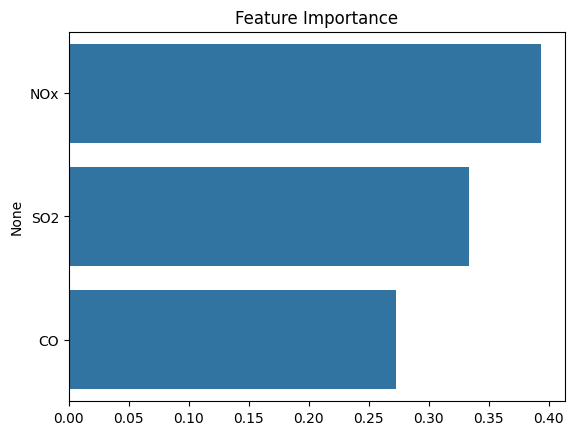

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a sample dataset (pollutant concentrations + pollution source)
data = {
    'NOx': [60, 10, 80, 5, 100, 7, 3, 90, 85, 6],
    'SO2': [30, 5, 40, 3, 45, 2, 1, 35, 38, 2],
    'CO': [2.5, 0.2, 3.0, 0.1, 4.2, 0.3, 0.1, 3.5, 3.8, 0.2],
    'Source': ['traffic', 'natural', 'traffic', 'natural', 'industry',
               'natural', 'natural', 'industry', 'traffic', 'natural']
}

df = pd.DataFrame(data)

# 2. Prepare features and target variable
X = df[['NOx', 'SO2', 'CO']]
y = df['Source']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predict and evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6. Visualize feature importance
importances = model.feature_importances_
feature_names = X.columns

sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


### 📊 Model Evaluation & Interpretation

#### 🧪 Classification Report

The model tried to classify air pollution sources into three categories:  
- **Industry**
- **Natural**
- **Traffic**

Here's how it performed on the test data:

- ✅ **Natural** sources were correctly identified — perfect precision and recall.
- ❌ **Industry** and **Traffic** were **not predicted at all**, which means:
  - The test data didn’t include examples of "industry", or the model wasn’t confident enough to predict it.
  - "Traffic" was present in the test data but was **misclassified**.

Overall accuracy = **67%**, but this value is a bit misleading due to the small dataset size (only 3 samples in test set).

---

#### 📌 Confusion Matrix

| True Label → | Predicted: Industry | Predicted: Natural | Predicted: Traffic |
|--------------|----------------------|---------------------|---------------------|
| **Industry** |          0           |          0          |          0          |
| **Natural**  |          0           |          2          |          0          |
| **Traffic**  |          1           |          0          |          0          |

- The model correctly predicted **2 natural** cases.
- It **misclassified 1 traffic** case as **industry**.
- **No correct predictions** for "industry".

---

#### 🌿 Feature Importance Plot

The model ranked features based on their importance in classification:

- **NOx** had the highest impact.
- Followed by **SO2** and then **CO**.

This means **NOx** levels are most helpful in determining the pollution source in this dataset.

---

⚠️ **Note**: The dataset is very small, so performance metrics may not be reliable. Try increasing the data size for better evaluation.
---
---



### ⚗️ What is Kinetics in Atmospheric Chemistry?

In the atmosphere, gases and particles constantly react with each other.  
**Kinetics** studies:

- 🕒 **Reaction rates**
- ⚙️ **Reaction mechanisms** (the steps involved)
- 🌡️ Factors like **temperature**, **sunlight**, and **humidity** that speed up or slow down reactions

---

### 🧪 What is Emulation?

**Emulation** means simulating real chemical behavior using **mathematical** or **computational models**.  
We use it to **replicate atmospheric reactions** inside a virtual environment.

---

### 🎯 Why Emulate Kinetics?

To **predict and understand**:

- When and where pollutants are produced  
- How long they stay in the air  
- What they transform into  
- Their impact on **health**, **climate**, and the **environment**

---

### 🌐 Practical Example of Emulating Atmospheric Kinetics

**Example: Ozone (O₃) Formation in the Troposphere**

Under sunlight, **Volatile Organic Compounds (VOCs)** react with **Nitrogen Oxides (NOx)** to produce ozone.

To simulate this reaction, we need to consider:

- 🌫️ Amounts of **NOx** and **VOCs** in the region  
- ☀️ **Sunlight intensity**  
- 🌡️ **Temperature** and **pressure**  
- 💨 **Wind speed** and **direction**

---

### 🧠 What Does Emulation Do?

Using **computational models** (e.g., differential equations), we can simulate:

- How much **ozone** is formed  
- When ozone levels **peak**  
- How far it **spreads** in the atmosphere

This helps us understand pollution dynamics and design better environmental policies.


### ⚡ How Machine Learning Helps in Atmospheric Chemistry

1️⃣ **Emulator Models**  
ML can replace complex chemical solvers with fast, approximate models (e.g., Neural Networks) that simulate reaction behavior efficiently.

2️⃣ **System Behavior Prediction**  
ML models can predict outcomes (like ozone levels) using historical data — without solving full equations.

3️⃣ **Sensitivity Analysis**  
ML helps identify which factors (e.g., temperature, sunlight, NOx) most influence pollutant formation or destruction.

4️⃣ **Model Reduction**  
Techniques like PCA or Autoencoders reduce the number of reactions or variables without losing accuracy.

5️⃣ **Spatio-Temporal Forecasting**  
RNNs or GNNs can forecast how pollution evolves across time and space.

6️⃣ **Faster Climate Simulations**  
ML can speed up chemistry solvers in climate models (e.g., GEOS-Chem) by replacing time-consuming kinetic calculations.

---
### 🌿 Simple ML Project: Predicting Ozone (O₃) Levels

Let’s start a simple project to **predict ozone (O₃) concentration** using machine learning.

#### 🎯 Project Goal:
Use features like:
- **NOx concentration**
- **SO₂ concentration**
- **Temperature**

to predict **ozone (O₃) levels** in the atmosphere.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create synthetic data: NOx, SO2, Temp → O3
np.random.seed(42)
n = 100

NOx = np.random.uniform(10, 100, n)
SO2 = np.random.uniform(5, 50, n)
Temp = np.random.uniform(15, 35, n)

# Synthetic formula to generate ozone (O3) levels
O3 = 0.5 * NOx + 0.3 * SO2 + 2 * Temp + np.random.normal(0, 10, n)

# Create DataFrame
df = pd.DataFrame({'NOx': NOx, 'SO2': SO2, 'Temp': Temp, 'O3': O3})
df.head()


,NOx,SO2,Temp,O3
0,43.708611,6.414313,27.840633,79.915584
1,95.564288,33.638469,16.682799,84.723279
2,75.879455,19.146019,18.232574,101.588123
3,63.879264,27.885681,32.971084,112.586694
4,24.041678,45.840491,27.128581,59.778723


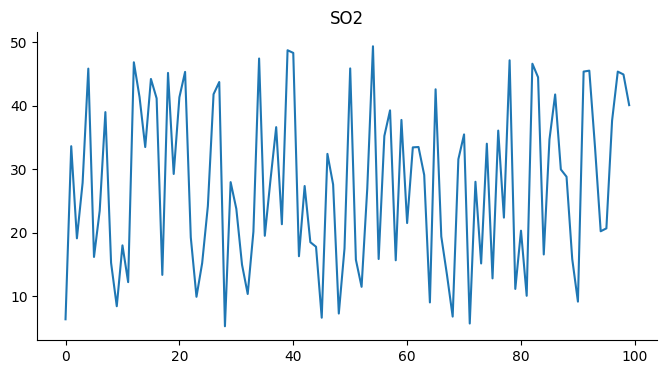

In [11]:
# @title SO2

from matplotlib import pyplot as plt
df['SO2'].plot(kind='line', figsize=(8, 4), title='SO2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
# Install XGBoost if not already installed
!pip install xgboost > /dev/null 2>&1

import xgboost as xgb

# Separate features and target
X = df[['NOx', 'SO2', 'Temp']]
y = df['O3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)



Mean Squared Error: 269.1036649845846
R² Score: 0.592517908580859


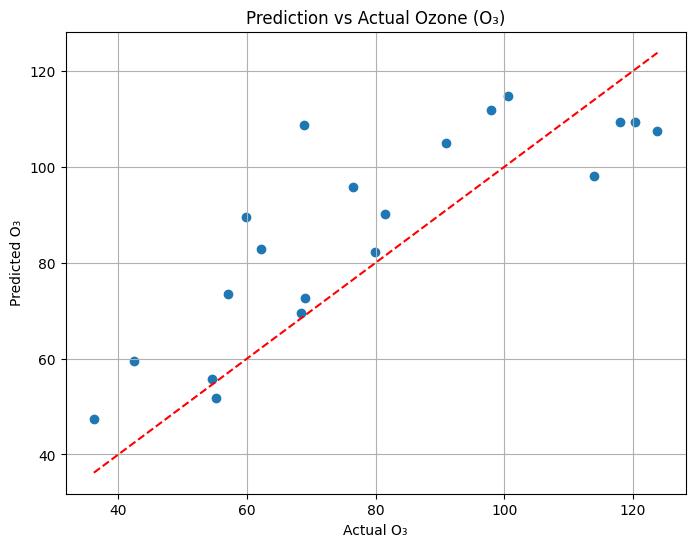

In [13]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plotting predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual O₃")
plt.ylabel("Predicted O₃")
plt.title("Prediction vs Actual Ozone (O₃)")
plt.grid()
plt.show()


### ✅ Conclusion

This project shows how we can use **Machine Learning (XGBoost model)** to **approximate and simulate the kinetic behavior of ozone (O₃)** quickly and efficiently —  
**without solving complex chemical equations**.

It demonstrates the power of data-driven models in atmospheric chemistry. 🌍⚗️


### 🌲 Random Forest vs ⚡ XGBoost

Both **Random Forest** and **XGBoost** are powerful **ensemble learning algorithms**, but they work differently:

---

#### 🌲 Random Forest – *Bagging Method*
- Builds **many decision trees in parallel**
- Final prediction is based on:
  - **Average** (for regression)
  - **Majority vote** (for classification)
- Helps reduce **variance**
- Simple and robust, less prone to overfitting

---

#### ⚡ XGBoost – *Boosting Method*
- Builds **trees sequentially**, where each new tree learns from the previous one's mistakes
- Focuses on reducing **bias** and improving prediction accuracy
- Often achieves **higher performance**, especially with tuned parameters
- Widely used in competitive machine learning (e.g., Kaggle)

---

### 🧠 Summary

| Feature         | Random Forest       | XGBoost              |
|-----------------|---------------------|----------------------|
| Type            | Bagging             | Boosting             |
| Tree Building   | Parallel            | Sequential           |
| Goal            | Reduce variance     | Reduce bias          |
| Speed           | Fast                | Very fast & optimized|
| Accuracy        | High                | Often higher         |

Choose the right model based on your data size, complexity, and accuracy needs!


---

### ⚙️ What is Enhancing a Solver?

In scientific simulations (like atmospheric chemistry or climate models), we solve complex systems of differential equations using **numerical solvers**.

**Enhancing a solver** means improving its **speed**, **accuracy**, or **stability** to make simulations more efficient.

---

### 🌍 Applications in Atmospheric Chemistry

Solvers are used to simulate:
- 🧪 **Chemical reactions** (kinetics)
- 💨 **Pollutant transport**
- ☀️ **Radiation and temperature effects**

But... these processes are **computationally expensive**, especially in large-scale models like **GEOS-Chem** or **WRF-Chem**.

---

### 🤖 Role of Machine Learning in Enhancing Solvers

1. **Surrogate Models**  
   Replace parts of the solver with ML models (e.g., neural networks) to approximate results 10–100× faster.

2. **Model Reduction**  
   Use techniques like **Autoencoders** or **PCA** to reduce model complexity and speed up computation.

3. **Adaptive Time-Stepping**  
   ML can predict the optimal time step size to balance speed and accuracy.

4. **Stability Monitoring**  
   ML can detect solver divergence early and adjust strategies to maintain stability.

---

### 🚀 Real-World Example (NASA)

In a NASA project using **GEOS-Chem**, the **kinetic solver** was replaced by a **neural network**.

✅ **Result**: Simulation time dropped from **hours to minutes**, with high accuracy maintained.

---

Machine Learning is transforming traditional solvers into faster, smarter engines for scientific discovery. 🔬


### 🧮 Simple Scenario: Solving a Differential Equation with ML Emulation

Let’s consider a basic differential equation that needs to be solved numerically:

### 🤖 Neural Network as a Numerical Solver

We aim to build a **neural network** that mimics a numerical solver by predicting the output  
$$
y(t)
$$
for the following differential equation:

$$
\frac{dy}{dt} = -0.5y, \quad y(0) = 1
$$

The neural network will learn to approximate the solution curve just like a traditional solver.

---

#### ✅ Exact Analytical Solution:
$$
y(t) = e^{-0.5t}
$$

---

### 🔧 Our Goal:

1️⃣ **Solve it numerically** using the **Euler method**  
2️⃣ **Train a Machine Learning model** (e.g., **Linear Regression**) to **emulate** the numerical solution

This demonstrates how ML can approximate the behavior of traditional numerical solvers with high speed and reasonable accuracy.




7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


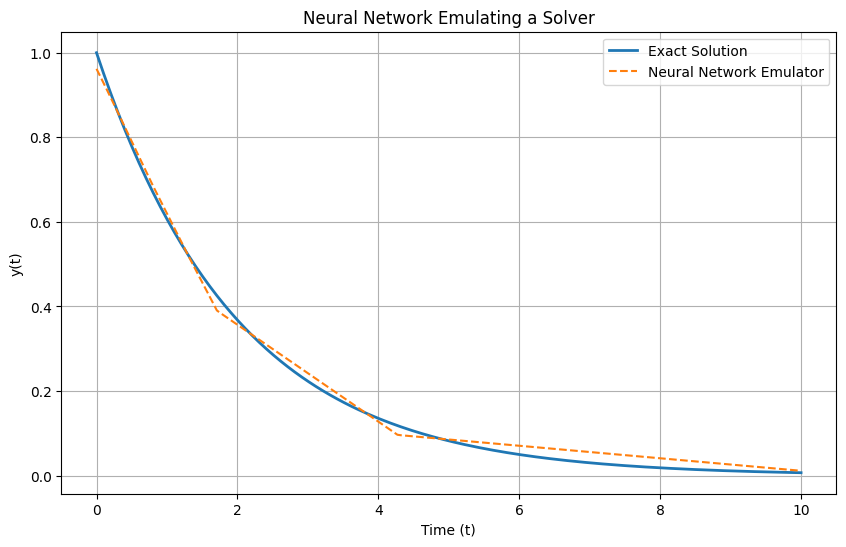

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define the differential equation and solve it numerically using Euler's method to generate training data
def dydt(y, t):
    return -0.5 * y

t_values = np.linspace(0, 10, 200)  # Time values from 0 to 10
dt = t_values[1] - t_values[0]      # Time step
y_values = [1]  # Initial condition y(0) = 1

# Numerical solution using Euler's method
for i in range(1, len(t_values)):
    y_prev = y_values[-1]
    y_new = y_prev + dt * dydt(y_prev, t_values[i - 1])
    y_values.append(y_new)

# Prepare input and output data
X = t_values.reshape(-1, 1)
y = np.array(y_values).reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=300, verbose=0)

# Predict using the trained neural network
y_pred_nn = model.predict(X)

# Compute the exact analytical solution
y_exact = np.exp(-0.5 * t_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_exact, label="Exact Solution", linewidth=2)
plt.plot(t_values, y_pred_nn, label="Neural Network Emulator", linestyle='--')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.title("Neural Network Emulating a Solver")
plt.legend()
plt.grid(True)
plt.show()
